# Project 2 - the Kohonen algorithm

By: Avia Oren & Maya Hayat


### Imports

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Step 1: create the sample data

In [25]:
num_points = 1000 # we chose 1000 as the number of data points as it is way more than the number of neurons.

# Generate the points randomly where 0<=x<=1 and 0<=y<=1 
x = np.random.uniform(0, 1, num_points)
y = np.random.uniform(0, 1, num_points)

# Combine the x and y coordinates to create the data points
data = np.column_stack((x, y))
test_set  = data[:100,:]
train_set = data[100: , :]

## Step 2 : The algorithm

In [26]:
# Initialize weights randomlly as mentioned in class, input dim is always 2 as we're dealing only with 2D shapes
def initialize_weights(num_neurons, input_dim):
    return np.random.rand(num_neurons, input_dim)

# Finding the best matching unit using euclidean
def find_bmu(input_vector, weights):
    distances = np.linalg.norm(input_vector - weights, axis=1)
    best_match = np.argmin(distances)
    return best_match

# Updating the weights, note that we have to set the neibourhood radius
def update_weights(input_vector, weights, best_match, learning_rate, neighborhood_radius):
    influence = np.exp(-np.square(np.arange(weights.shape[0]) - best_match) / (2 * neighborhood_radius**2))
    #the actual update (depends on learning rate as well as the weights, distance and so on)
    weights += learning_rate * influence[:, np.newaxis] * (input_vector - weights)

# Training the Kohonen algorithm
def train_som(data, num_neurons, input_dim, epochs, learning_rate, starting_neighborhood_radius):
    new_weights = initialize_weights(num_neurons, input_dim)
    
    for epoch in range(epochs):
        # The learning rate and neighborhood radius over time
        curr_learning_rate = learning_rate * (1 - epoch / num_epochs)
        curr_radius = starting_neighborhood_radius * (1 - epoch / num_epochs)

        for input_vector in data:
            # Find the BMU and update its weights
            bmu_index = find_bmu(input_vector, new_weights)
            update_weights(input_vector, new_weights, bmu_index, curr_learning_rate, curr_radius)

    return new_weights


little explanation about BMU function : 
`bmu_index = np.argmin(distances)`: This line finds the index of the neuron with the minimum distance, i.e., the neuron that is the closest match to the input_vector
. `return bmu_index`: The function returns the index of the BMU, representing the neuron in the SOM that is the closest match to the input_vector.
In summary, the `find_bmu` function calculates the distances between the input_vector and each neuron's weight vector, and then determines the index of the neuron with the minimum distance, i.e., the BMU

### Ex_1: 20 neurons

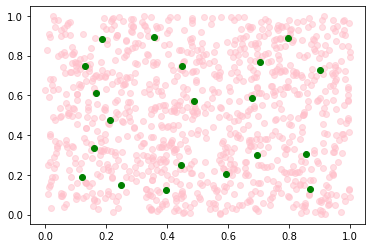

In [10]:
# Generate training data (a square)
data = np.random.rand(1000, 2)

# Define the parameters used for the algorithm, easier to understand rather than directly in fucntion
num_neurons = 20
num_epochs = 100 # Tried higher (1000) doesn't make much of a difference (can see below) but takes way longer
learning_rate = 0.1 
starting_neighborhood_radius = num_neurons / 2  

# Train the SOM
new_weights = train_som(data, num_neurons, 2, num_epochs, learning_rate, starting_neighborhood_radius)

# Plot the resulting line of neurons
plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green')
plt.show()

### Ex_1.2 200 neurons

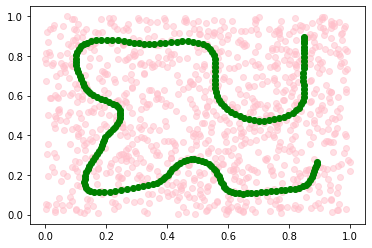

In [27]:
# Define the parameters for the SOM
num_neurons = 200 
num_epochs = 100 
learning_rate = 0.1 
starting_neighborhood_radius = num_neurons / 2  # Initial neighborhood radius

# Train the algo
new_weights = train_som(data, num_neurons, 2, num_epochs, learning_rate, starting_neighborhood_radius)

# Plot the resulting line of neurons
plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green')
plt.show()

### Self testing : What happens as the number of epochs of algorithm increases?

In [28]:
# Generate training data (a square)
data = np.random.rand(1000, 2)

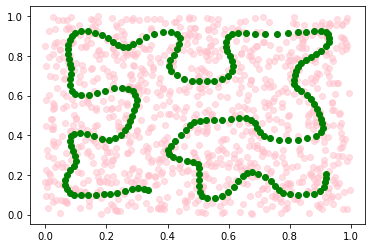

In [29]:
# Define the parameters for the SOM
num_neurons = 200  # Number of neurons in the line
num_epochs = 1000  # Number of training epochs
learning_rate = 0.1  # Learning rate
starting_neighborhood_radius = num_neurons / 2  # Initial neighborhood radius

# Train the Algorithm
new_weights = train_som(data, num_neurons, 2, num_epochs, learning_rate, starting_neighborhood_radius)

# Plot the resulting line of neurons
plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green')
plt.show()

## Ex_1.2 Data is Proportional to the size of x, but uniform to the size of y

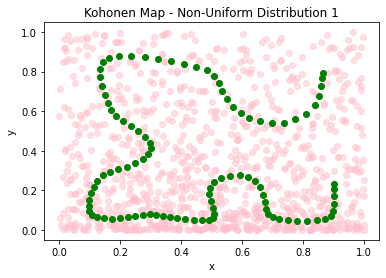

In [18]:
# This time the data set is proportional to the size of x, but uniform to the size of y
x = np.random.uniform(0, 1, 1000)
y = np.random.uniform(0, 1, 1000) ** 2  # Probability proportional to x^2
data = np.column_stack((x, y))

# Define the parameters for the SOM
num_neurons = 100  # Number of neurons in the line
num_epochs = 100  # Number of training epochs
learning_rate = 0.1  # Learning rate
starting_neighborhood_radius = num_neurons / 2  # Initial neighborhood radius

# Train the algo
weights = train_som(data, num_neurons, 2, num_epochs, learning_rate, starting_neighborhood_radius)

# Plot the resulting Kohonen map
plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(weights[:, 0], weights[:, 1], c='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Non-Uniform Distribution 1')
plt.show()

## Ex_1.3 the data set is proportional to the size of Y, but uniform to the size of X

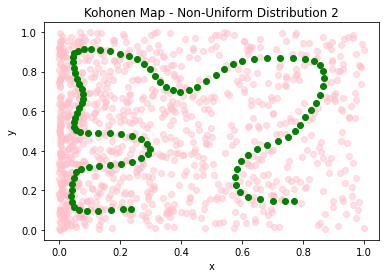

In [19]:
# Generate non-uniform data points within the square
x = np.random.uniform(0, 1, 1000) ** 2  # Probability proportional to x^2
y = np.random.uniform(0, 1, 1000)
data = np.column_stack((x, y))

# Train the SOM
weights = train_som(data, num_neurons, 2, num_epochs, learning_rate, starting_neighborhood_radius)

# Plot the resulting Kohonen map
plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(weights[:, 0], weights[:, 1], c='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Non-Uniform Distribution 2')
plt.show()


## Same code - increased number of epochs by 10:

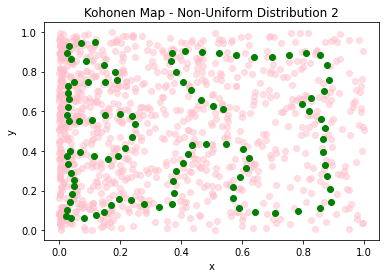

In [20]:
# Define the parameters for the SOM
num_neurons = 100  # Number of neurons in the line
num_epochs = 1000  # Number of training epochs
learning_rate = 0.1  # Learning rate
starting_neighborhood_radius = num_neurons / 2  # Initial neighborhood radius

# Generate non-uniform data points within the square
x = np.random.uniform(0, 1, 1000) ** 2  # Probability proportional to x^2
y = np.random.uniform(0, 1, 1000)
data = np.column_stack((x, y))

# Train the SOM
weights = train_som(data, num_neurons, 2, num_epochs, learning_rate, starting_neighborhood_radius)

# Plot the resulting Kohonen map
plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(weights[:, 0], weights[:, 1], c='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kohonen Map - Non-Uniform Distribution 2')
plt.show()


#### By observing the snapshots of the Kohonen maps as the number of iterations grows, you can see how the neurons gradually adapt and organize themselves to capture the underlying patterns of the non-uniform distributions.
That is, the number of neurons on the side where there is more data increases and, in contrast, their number on the other side is small.

## Part 2: the data is in a donut shape

In [21]:
# Randomizing the data in the requested shape {<x.y> | 4<= x^2 +y^2 <= 16}
theta = np.linspace(0, 2 * np.pi, 1000)
r = np.random.uniform(2, 4, 1000)
x = r * np.cos(theta)
y = r * np.sin(theta)
data = np.column_stack((x, y))

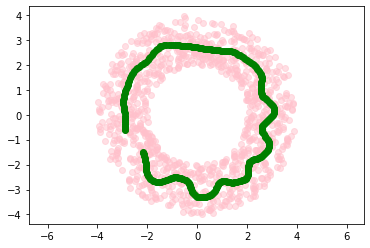

In [22]:
# Define the parameters for the algo
num_neurons = 300  
num_epochs = 200 
learning_rate = 0.1 
starting_neighborhood_radius = num_neurons / 2  # Initial neighborhood radius

# Train the algorithm
new_weights = train_som(data, num_neurons, 2, num_epochs, learning_rate, starting_neighborhood_radius)

# Plot the resulting circle of neurons
plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green')
plt.axis('equal')
plt.show()

## Increasing the number of epochs for the same data - 1,000

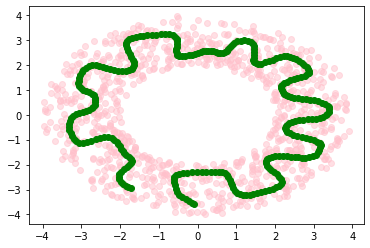

In [23]:
num_neurons = 300  # Had to use 300 neurons for ex
num_epochs = 1000  # Increasing the num of epochs
learning_rate = 0.1
starting_neighborhood_radius = num_neurons / 2  # Initial neighborhood radius

# Train the SOM
new_weights = train_som(data, num_neurons, 2, num_epochs, learning_rate, starting_neighborhood_radius)

# Plot the resulting line of neurons
plt.scatter(data[:, 0], data[:, 1], c='pink', alpha=0.5)
plt.scatter(new_weights[:, 0], new_weights[:, 1], c='green')
plt.show()